# Prompt Engineering Definition
_also known as In-Context Prompting, refers to methods for how to communicate with LLM to steer its behavior for desired outcomes without updating the model weights. It is an empirical science and the effect of prompt engineering methods can vary a lot among models, thus requiring heavy experimentation and heuristics_

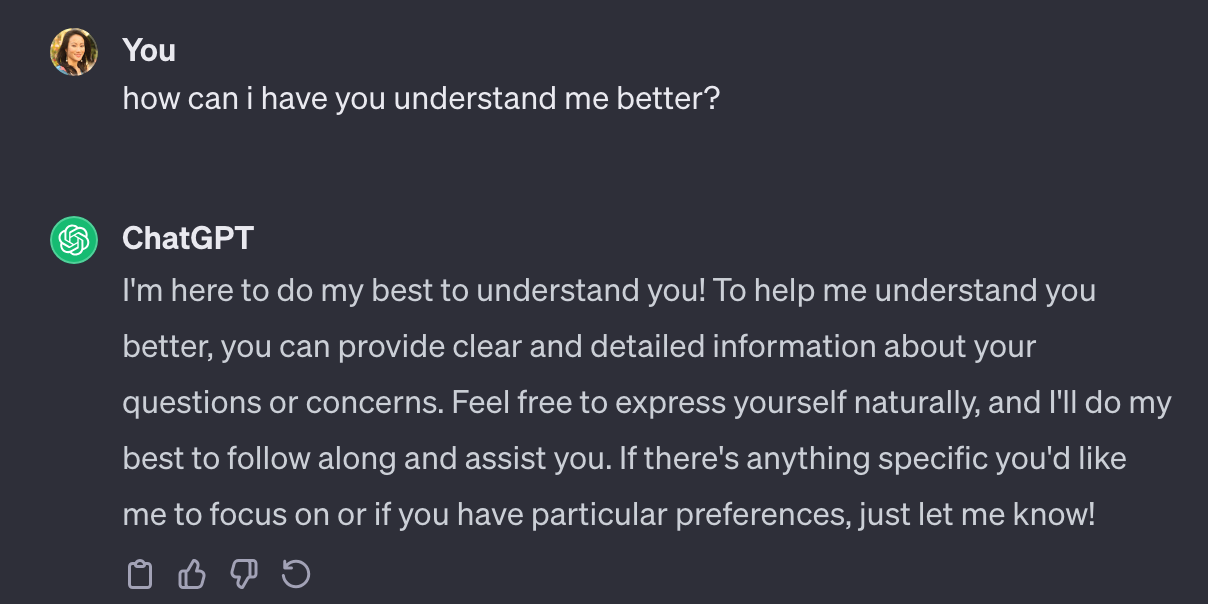

# Motivation

* started using Midjourney yesterday and was dissatisfied with the results. Long story short: I wanted a simple LinkedIn picture update. And I was given pictures that made me look old. :( So looking to see how I can improve my prompting)
* help with stakeholder relationships since "this was not what I expected" responses have come up

# Goals
* create better user experience for myself
     * achieving my use cases (crafting customized resume's automatically, LinkedIn picture update)
     * optimize my prompts/queries to have less queries for desired result
* add skillset to my DS toolkit (most in-demand skill right now)
     * [ ] evidence of a.) complex and clever prompting architecture or b.) a systematic evaluation of an LLM’s behavior
     * [ ] discover, test, and document best practices for a wide range of tasks relevant to our customers
     * [ ] build up a library of high quality prompts or prompt chains to accomplish a variety of tasks, with an easy guide to help users search for the one that meets their needs
     * [ ] build a set of tutorials and interactive tools that teach the art of prompt engineering to our customers
     * [ ] work with large enterprise customers on their prompting strategies.
     * [ ] [helpful Fiverr post on why AI prompt eng is valuable](https://www.fiverr.com/resources/guides/business/why-hire-prompt-engineer)
* see what is possible with all the LLM's out there
    * specifically, look at industry-specific prompt libraries that may need to be generated by seeing what is on Upwork/Fiverr

# References
* https://timbornholdt.com/blog/prompt-engineering-how-to-think-like-an-ai good overview, but don't get lost in the samples
* https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/from from Head of Safety Systems @ OpenAI, got technical pretty fast
* https://www.deeplearning.ai/short-courses/chatgpt-prompt-engineering-for-developers/ my man and possible distant relative, Andrew Ng, is back with OpenAI's  Isa Fulford, Member of Technical Staff
* Main Chatbot Players in the Market's Prompt Guides:
    * [OpenAI-ChatGPT](https://platform.openai.com/docs/guides/prompt-engineering)
    * [OpenAI-DALL·E](https://help.openai.com/en/articles/6582391-how-can-i-improve-my-prompts-with-dall-e)
    * [Anthropic](https://docs.anthropic.com/claude/docs/guide-to-anthropics-prompt-engineering-resources)
    * [Bing Chat](https://www.microsoft.com/en-us/bing/do-more-with-ai/ai-prompt-writing?form=MA13KP)
    * [Pi- not official, just for fun](https://www.reddit.com/r/ChatGPT/comments/150uysy/my_30minute_casual_conversation_with_pi_the_ai/)
    * [Midjourney](https://docs.midjourney.com/docs/prompts)

# Deeplearning.AI's ChatGPT Prompt Engineering Course

## 1. Guidelines

Notes on using the OpenAI API outside of this classroom
To install the OpenAI Python library:

```!pip install openai```
The library needs to be configured with your account's secret key, which is available on the website.

You can either set it as the ```OPENAI_API_KEY``` environment variable before using the library:

``` !export OPENAI_API_KEY='sk-...'```
Or, set ```openai.api_key``` to its value:

```import openai
openai.api_key = "sk-..."```

In [1]:
# Installing Packages
!pip install openai --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.7 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 14.0.1 which is incompatible.
jupyterlab 4.0.5 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.0.1 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.0.1 requires jupyterlab<5.0.0a0,>=4.0.6, but you have jupyterlab 4.0.5 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.24.3 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.11.4 which is incompatible.
tensorflow 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.9.0 which is incompatible.
tens

In [2]:
# Library Imports
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

# import json

In [3]:
# Old way of getting API keys into notebook
# credentials2 = json.load(open('/kaggle/input/credentials2/credentials2.json'))
# openai.api_key = credentials2['openai_apikey']

In [4]:
# Trying out secrets feature inside Kaggle notebook to access OpenAI API

from kaggle_secrets import UserSecretsClient
secret_label = "openai_apikey"
# secret_value = UserSecretsClient().get_secret(secret_label)
openai.api_key = UserSecretsClient().get_secret(secret_label)

In [5]:
# Using OpenAI's gpt-3.5-turbo model and the chat completions endpoint.

# This helper function will make it easier to use prompts and look at the generated outputs.
# Using the OpenAI library version 1.0.0

client = openai.OpenAI(api_key=openai.api_key)

def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0  # this is the degree of randomness of the model's output
    )
    return response.choices[0].message.content

## Prompting Principles
- **Principle 1: Write clear and specific instructions**
- **Principle 2: Give the model time to “think”**

### Tactics

#### Tactic 1: Use delimiters to clearly indicate distinct parts of the input
- Delimiters can be anything like: ```, """, < >, `<tag> </tag>`, `:`

In [6]:
# text = f"""
# You should express what you want a model to do by \ 
# providing instructions that are as clear and \ 
# specific as you can possibly make them. \ 
# This will guide the model towards the desired output, \ 
# and reduce the chances of receiving irrelevant \ 
# or incorrect responses. Don't confuse writing a \ 
# clear prompt with writing a short prompt. \ 
# In many cases, longer prompts provide more clarity \ 
# and context for the model, which can lead to \ 
# more detailed and relevant outputs.
# """
# prompt = f"""
# Summarize the text delimited by triple backticks \ 
# into a single sentence.
# ```{text}```
# """
# response = get_completion(prompt)
# print(response)

# Use Case #1: Job Search Help
1. Given a set of responsibilities and skills, scrape the web for open remote roles that have these, but also make sure there are opportunities to learn new skills (not strict matching of skills to job post).
1. [x] From a given job description, highlight the most sought after skills. (information retrieval)
1. From a given job description, curate friendly and concise LI request for referral.
1. From a given job description, curate a customized resume.
1. Given a person's LinkedIn/title, compose a list of interview questions for someone going through an interview with a Hiring Manager at [company] in [industry/problem space].
1. Given a job description/list of responsibilities, compose practice SQL questions.
1. Given a job description/list of responsibilities, compose practice business case studies. 
1. Compare results with what I can create/my notes/web.
1. Keep iterating on prompts using tips to optimize result to what is desired as output from model.
1. Compare optimized/optimize more prompts between different models within OpenAI (3.5 Turbo) or across competitors (GPT-4 for free with Bing AI Chat (Microsoft)).

# (1) Scrape Web for Job Opportunities Related to my Background and Experience
* First try the generic data analyst/scientist responsibilities
* Next iteration: remote
* Next iteration: SF Bay Area
* Next iteration: AI companies only

Looks like Chatbots cannot scrape the web and get real-time information because they are pre-trained on data up to a previous point in time. So will need to search for job openings manually. Probably can set up some scraper though programmatically without using chatbot.

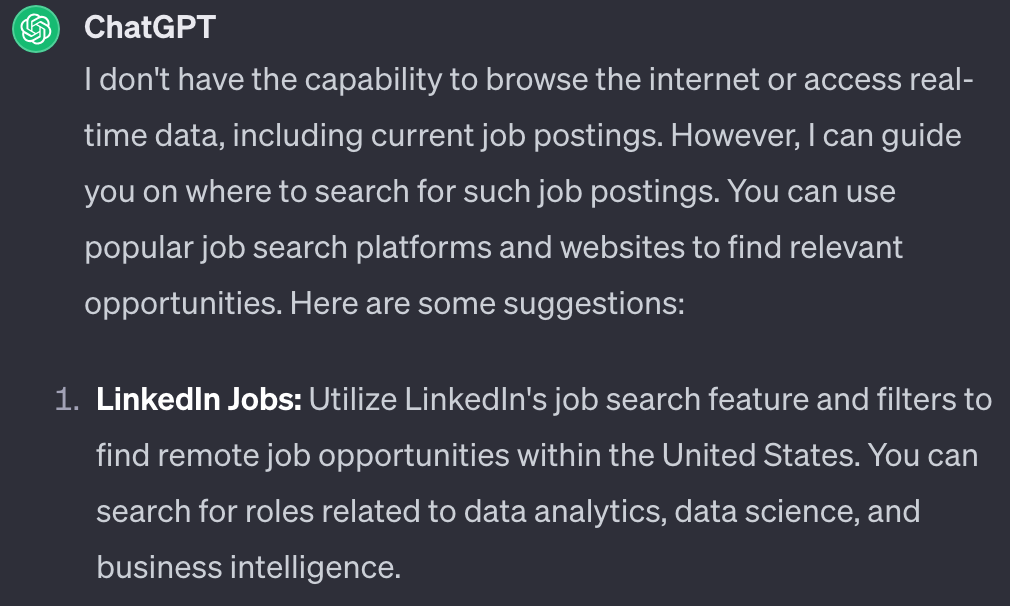

### Alternative:

May want to build scraper using Beautiful Soup/Selenium (to be completed in another project) - scrape web/specific job boards for key words: Data Analyst/Scientist, metrics, A/B tests, inference etc.


References:
* https://www.chrislovejoy.me/job-scraper
* https://www.google.com/search?q=scrape+web+to+get+job+openings+using+key+words+python&sca_esv=76e5c97e26a6097a&rlz=1C5CHFA_enUS931US931&sxsrf=ACQVn095Z62yPVOH8qj60RfS4NwtYU2a_w%3A1705107521682&ei=QeChZZmVKZ-ywt0PqpOyoAk&ved=0ahUKEwjZuYjBlNmDAxUfmbAFHaqJDJQQ4dUDCBA&uact=5&oq=scrape+web+to+get+job+openings+using+key+words+python&gs_lp=Egxnd3Mtd2l6LXNlcnAiNXNjcmFwZSB3ZWIgdG8gZ2V0IGpvYiBvcGVuaW5ncyB1c2luZyBrZXkgd29yZHMgcHl0aG9uSABQAFgAcAB4AZABAJgBAKABAKoBALgBA8gBAPgBAeIDBBgAIEE&sclient=gws-wiz-serp

# (2) Most sought after skills from Job Opportunity
[Guidance](https://www.reddit.com/r/ChatGPT/comments/15dwp01/put_together_every_chatgpt_prompt_i_use_in_job/)

## Prompt 
to get most sought after skills from job opportunity:

Input in ChatGPT 3.5 Web Input Bar:
- [Prompt]
- [Job Description]

### Prompt #1

```
Pretend you are an applicant tracking system. Review this job listing. Now extract important keywords from this job post.

```


## Job Description
for Lead Data Analyst at Tovala:

### About the job

We're Tovala, a food-tech company completely reinventing home cooking to save consumers time. Through an innovative combination of hardware, software, and food, we give our customers a way to enjoy really good, good-for-you meals without sacrificing time to do whatever matters to them. We've amassed a loyal, rapidly growing following in just a few years, radically changing the day-to-day lives of people across the country and successfully creating a new model for the food industry. We're looking for great people to join our team of hard-working, food-loving nerds.

### How you'll spend your time at Tovala
	• Work within a centralized Data Team (Engineers and Analysts) to support our Product Team
	• Design, conduct, and report on experiments to verify/nullify the Product Team’s hypotheses
	• Champion analytically backed recommendations to uncover high value opportunities
	• Own ETL, data validations, and documentation to support your and others’ analyses
	• Inform implementation details with Product and Software teams to ensure data integrity
	• Identify and seize opportunities for automation, consolidation, and templatization
	• Support demand forecasting by assessing and updating models as the business evolves
	• Mentor more junior teammates to be more effective (presentation skills, technical skills, etc.)
	• Partner with Data Engineers to identify and scope integrations of new value-add datasets

### About you

#### We’re not big on buzzwords like “rockstar”. So here’s what we’re actually looking for:

	• You’re humble, accountable, and intelligent. You value those things in that order.
	• You’re highly analytical. You have a strong foundation in statistics, experiment design, and analytical methods. You dig beyond surface-level answers and get to the “why” rather than stopping at the “what”.
	• You’re an excellent communicator. You effectively communicate priorities, blockers, and results. You can identify ambiguities and work collaboratively with less technical folks to achieve clarity.. You cater your messaging to your audience and are comfortable presenting findings, whether to a fellow Analyst or the CEO.
	• You’re technologically savvy. You will be trusted to independently make and justify tradeoffs between technical implementations depending on the scope, impact, and urgency of the problem.
	• You’re results oriented. You’re comfortable making deliberate tradeoffs between “the best way” and “the most useful quick way” of achieving results. Nobody checks (or cares) what hours you work - we care that the work gets done and that you feel happy and supported doing it.
	• You bring your authentic self to work. Give us a chance to appreciate the person behind the job title. Bonus points if your authentic self is passionate about stats and food!

### Requirements
	• Native fluency in SQL, Looker, and Python/R
	• Proficiency in dbt
	• Extensive experience applying statistical/econometric models to solve business problems
	• Expertise designing and implementing intuitive ETL to underlie your analyses and predictions
	• Experience A/B testing at enterprise scale
	• Experience using version-control to develop and update code (git, bitbucket, etc.)
	• Begrudging proficiency in MS Excel (rare, but sometimes necessary #StartupLife)

### ChatGPT's Response #1:

Keywords extracted from the job post:

1. **Tovala**
2. **Food-tech company**
3. **Reinventing home cooking**
4. **Hardware, software, and food**
5. **Loyal, rapidly growing following**
6. **Food-loving nerds**
7. **Centralized Data Team**
8. **Engineers and Analysts**
9. **Product Team**
10. **Experiments**
11. **Hypotheses**
12. **Analytically backed recommendations**
13. **ETL**
14. **Data validations**
15. **Documentation**
16. **Data integrity**
17. **Automation**
18. **Consolidation**
19. **Templatization**
20. **Demand forecasting**
21. **Mentor**
22. **Automation**
23. **Consolidation**
24. **Templatization**
25. **Demand forecasting**
26. **Mentor**
27. **Data Engineers**
28. **Integrations**
29. **Value-add datasets**
30. **Humble, accountable, intelligent**
31. **Analytical**
32. **Statistics**
33. **Experiment design**
34. **Analytical methods**
35. **Communication**
36. **Technical savvy**
37. **Results oriented**
38. **SQL**
39. **Looker**
40. **Python/R**
41. **Proficiency in dbt**
42. **Statistical/econometric models**
43. **ETL**
44. **A/B testing**
45. **Version-control**
46. **Git, Bitbucket**
47. **MS Excel**

Pretty good. Captures a lot of the job requirements. This time let's cut out the job description introduction describing the company.

### Prompt #2, but with truncated job description

Keywords extracted from the job post:

1. **Tovala**
2. **Data Team**
3. **Engineers**
4. **Analysts**
5. **Product Team**
6. **Experiments**
7. **Hypotheses**
8. **Analytically backed recommendations**
9. **High value opportunities**
10. **ETL**
11. **Data validations**
12. **Documentation**
13. **Data integrity**
14. **Implementation details**
15. **Automation**
16. **Consolidation**
17. **Templatization**
18. **Demand forecasting**
19. **Models**
20. **Mentor**
21. **Junior teammates**
22. **Presentation skills**
23. **Technical skills**
24. **Data Engineers**
25. **Integrations**
26. **Value-add datasets**
27. **Humble**
28. **Accountable**
29. **Intelligent**
30. **Analytical**
31. **Statistics**
32. **Experiment design**
33. **Analytical methods**
34. **Communication**
35. **Priorities**
36. **Blockers**
37. **Results**
38. **Technical savvy**
39. **Results oriented**
40. **Tradeoffs**
41. **Implementation**
42. **Scope**
43. **Impact**
44. **Urgency**
45. **Authentic self**
46. **Passionate**
47. **SQL**
48. **Looker**
49. **Python/R**
50. **Proficiency in dbt**
51. **Statistical/econometric models**
52. **ETL design and implementation**
53. **A/B testing**
54. **Enterprise scale**
55. **Version-control**
56. **Git**
57. **Bitbucket**
58. **MS Excel**
59. **StartupLife**

Tried to link queries together (not adding job description keywords) because thought it had memory from one question to the next. And result was just a condensed version of my resume with no reference to points from job description from input/output. This seemed to be the case because during an earlier test case, asked ChatGPT to compose a customized resume and then asked it to just replace bulleted list of skills from job description with relevant bullet points from my resume's experience and skills. And what ended up happening was that the responses were repeatedly a customized resume as if it just ignored my question. 

# (3) Create customized resume based on job description.

## Prompt #3 (more successful)
Format:
- [Prompt]
- Separator: ###Job Description Key Words###
- Context: Keywords extracted from the job post: 
- [bulleted keywords from job description] (copied and pasted prior response from ChatGPT including Context portion)
- Separator: ###My Resume###
- [resume experience and bulleted skills]



*** Hashtags are very important. OpenAI Technical Contributor and co-instructor for DeepLearning.AI's course on Prompt Engineering said that separating components such as instructions from prompt with separators help the LLM understand what to do better. 

```
This is my resume. Based on the key words from the job description please improve my resume to match the job listing?
```

## Ouput #3:

Certainly, let's enhance your resume to align with the job listing. I'll incorporate relevant keywords from the job description.

### Improved Resume:

#### Tovala Remote
Data Science and AI Applications Freelancer Oct. 2022 to Current
- Leveraged data science expertise for Tovala, contributing to the development of analytical solutions and AI applications.
  
#### Mercari US Palo Alto, CA
Data Scientist Sept. 2022 to Oct. 2022
- Collaborated with the Data Team and Engineers to establish a metrics table in Dataform, powering dashboards and facilitating experiment assessments.
- Applied statistical and econometric models to analyze price elasticity, providing insights into buyer demand changes.

#### Mercari US Palo Alto, CA
Business Intelligence Analyst Aug. 2021 to Aug. 2022
- Engaged with the Product Team in creating a Search RFM segmentation strategy, personalizing search experiences to boost GMV.
- Investigated query chaining and collaborated with Data Engineers to enhance search engine performance and understand user behavior.

#### Forethought San Francisco, CA
Implementation Engineer July 2020 to Sept. 2020
- Led technical requirements on the Customer Success team, collaborating with Engineers and Analysts, and touched all aspects of the business.
- Implemented state-of-the-art NLP models and contributed to the entire data pipeline, showcasing skills in Data Engineering, Data Science, Machine Learning, and Business Intelligence.

#### Immuno Concepts Sacramento, CA
Quality Control Analyst July 2010 to Apr. 2019
- Employed statistical methods, including linear regression, to analyze product quality trends and provide recommendations for manufacturing efficiency.

#### University of California, Davis Davis, CA
Research Associate Jan. 2005 to Dec. 2008
- Conducted groundbreaking research in sigma70 subunit architecture, contributing to radioimmunotherapy for Non-Hodgkin's Lymphoma.

### Skills:

- **Data Team Collaboration:** Engaged with Engineers and Analysts to drive impactful solutions.
- **Experiments & Hypotheses:** Conducted experiments and analyzed hypotheses for data-driven decision-making.
- **ETL, Data Validations, Documentation:** Owned ETL processes, ensured data integrity, and maintained comprehensive documentation.
- **Implementation Details:** Worked closely with teams to inform implementation details.
- **Automation & Consolidation:** Identified and implemented opportunities for automation and consolidation.
- **Demand Forecasting & Models:** Applied statistical models and contributed to demand forecasting.
- **Mentorship:** Mentored junior teammates, enhancing their presentation and technical skills.
- **Passionate & Results-Oriented:** Passionate about stats and food, with a results-oriented approach.
- **Technical Proficiency:** Proficient in SQL, Python, Looker, and experienced with Git and version control.
- **Analytical Methods:** Applied strong analytical methods, including statistical and econometric models.
- **A/B Testing & Enterprise Scale:** Conducted A/B testing at enterprise scale for product improvements.
- **MS Excel & Version Control:** Proficient in MS Excel, Git, and Bitbucket, adapting to startup life.

This revised resume emphasizes your alignment with the key requirements and skills sought in the job listing.

This is nice. It went ahead and made my resume a hybrid between the original and parts of the job description's key points.

The output is mostly there, but need to correct for the mistake that I am not currently a remote worker at Tovala, but would love to work there. Also, another really important observation is at the end of the response, ChatGPT seems to fatigue out and just fill out job description with what sounds generally good even adding embellishments given job description instead of relevant and factual points from my resume e.g. I never informed it that I use Bitbucket. One way of looking at it is to see it as an opportunity to pick up that skill if get deeper in the interview process.

This is to 

### Prompt #4:
```
Based on your recommendations - can you make me a CV? It has to be short, use active voice and needs to highlight my accomplishments. Include the keywords from the job listing.
```



### Output #4

Certainly! Here's a short and impactful CV:

---

## [Your Full Name]
**Data Science and AI Specialist**

---

### Professional Experience:

#### Tovala, Remote
*Freelancer | Oct. 2022 - Present*

- **Contributions:**
  - Leveraged expertise in Data Science and AI Applications to deliver impactful solutions.
  
---

#### Mercari US, Palo Alto, CA
**Data Scientist | Sept. 2022 - Oct. 2022**

- **Achievements:**
  - Engineered a new metrics table in Dataform, empowering the search team with dynamic dashboards.
  - Conducted price elasticity analysis, deciphering buyer demand changes, and aligning with key category groups.

---

#### Mercari US, Palo Alto, CA
**Business Intelligence Analyst | Aug. 2021 - Aug. 2022**

- **Accomplishments:**
  - Spearheaded the creation of a personalized Search RFM segmentation strategy, significantly increasing GMV.
  - Analyzed user journeys, optimizing UI based on navigation and search activity, driving north star metrics.

---

#### Forethought, San Francisco, CA
**Implementation Engineer | July 2020 - Sept. 2020**

- **Key Contributions:**
  - Led end-to-end technical requirements, implementing cutting-edge NLP models.
  - Reduced client SPAM from 64% to less than 1%, saving over $20,000 in labor costs.

---

#### Immuno Concepts, Sacramento, CA
**Quality Control Analyst | July 2010 - Apr. 2019**

- **Notable Achievements:**
  - Developed and applied linear regression models, enhancing product quality tracking.
  - Provided key recommendations for manufacturing efficiency and increased profit margins.

---

#### University of California, Davis, Davis, CA
**Research Associate | Jan. 2005 - Dec. 2008**

- **Research Impact:**
  - Conducted groundbreaking research on sigma70 subunit architecture, contributing to Non-Hodgkin's Lymphoma radioimmunotherapy.

---

### Skills:

- **Data Science and AI:**
  - Executed impactful solutions in Data Science and AI Applications.
- **Technical Proficiency:**
  - Proficient in SQL, Python, Google Cloud Platform, Snowflake, dbt, Dataform, and Prompt Engineering.
- **Statistical & Analytical Skills:**
  - Applied advanced statistical methods, including A/B testing and regression analysis.
- **Machine Learning & NLP:**
  - Implemented state-of-the-art NLP models, showcasing expertise in Machine Learning and Natural Language Processing.
- **Data Management:**
  - Executed ETL processes, ensuring data integrity through data cleaning, assertions, and validations.
- **Visualization Tools:**
  - Utilized Looker and Tableau for impactful data visualization.

---

This CV is designed to be concise, using active voice to highlight your accomplishments and directly aligning with the keywords from the job description.

Good attempt, but not exactly a resume that is grabbing matching job needs and skills. Rather, overly summmarized (missing crucial and relevant experience) and the skills portion is general and redundant, not really aligned with outline from job description. 

# Matching Job Description Responsibilities and Skills:

1. After providing non-bulleted list of job description and bulleted list of experience and skills follwed with:

Prompt: "Modify job description bullet points according to skills from resume."

Result: Just summarized responsibilities and did not fill in responsibilities with my own experience or skills.

Action Steps: 
1. Take summaries (Prompt:
"Modify job description bullet points according to skills from resume.")
2. Try different prompt that has context, more detailed
3. This prompt actually filled in job description with relevant experience from my resume (Prompt: "For each bullet point in job description, replace with relevant point with matching key word in resume bullet point.")
4. However, when I tried to use the same prompt just after a prompt to create custom resume, started creating resume consistently despite change in instructions. Seemed like it was stuck in memory.
5. Trying out this new prompt: 